In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, chisquare

# Load the CSV file
file_path = 'events.txt'  # Replace with your file path
df = pd.read_csv(file_path)

# For TotalTime column only
total_time_array = df['TotalTime'].to_numpy()


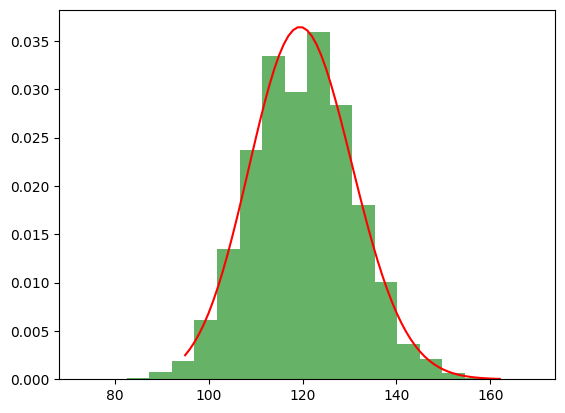

observed_freq:  [   1    0    0    0    1    0    1    2    7    4    6    7   18   19
   30   33   57   74  107  112  153  194  237  335  408  449  549  681
  861  953 1127 1258 1465 1641 1817 2059 2229 2538 2718 2919 2965 3241
 3467 3436 3541 3594 3567 3570 3596 3492 3500 3375 3269 3110 2866 2830
 2472 2324 2063 1869 1725 1582 1424 1184 1107  978  851  692  578  476
  395  319  310  234  206  149  127  118   90   52   42   34   29   18
   17   13    7    5    6    2    4    5    0    1    1    2]
expected_freq:  [7.91254859e-48 9.49257061e-46 5.69405013e-44 2.27702332e-42
 6.82928021e-41 1.63859782e-39 3.27633702e-38 5.61510621e-37
 8.42045258e-36 1.12243286e-34 1.34656653e-33 1.46859680e-32
 1.46821203e-31 1.35491756e-30 1.16105363e-29 9.28599550e-29
 6.96267193e-28 4.91353956e-27 3.27483481e-26 2.06777482e-25
 1.24033984e-24 7.08579925e-24 3.86396879e-23 2.01545553e-22
 1.00746374e-21 4.83455896e-21 2.23075029e-20 9.91184817e-20
 4.24682197e-19 1.75684523e-18 7.02553974e-18 2.71885

In [19]:

static_lambda = 120

def cs(n, y):
    return chisquare(n, np.sum(n)/np.sum(y) * y)

# Assuming 'observations' is your dataset
observations = total_time_array  # your data here
# Plot histogram and compare with Poisson distribution
plt.hist(observations, bins=20, density=True, alpha=0.6, color='g')
# lambda_ = static_lambda # observations.mean()
lambda_ = observations.mean()
x = np.arange(poisson.ppf(0.01, lambda_), poisson.ppf(0.9999, lambda_))
plt.plot(x, poisson.pmf(x, lambda_), 'r-')
plt.show()

# Perform a chi-square goodness-of-fit test
observed_freq, _ = np.histogram(observations, bins=np.arange(observations.min(), observations.max() + 1))
expected_freq = poisson.pmf(np.arange(len(observed_freq)), lambda_) * len(observations)
# chi_stat, p_value = chisquare(observed_freq, expected_freq)

print(f'observed_freq: ', observed_freq)
print(f'expected_freq: ', expected_freq)

chi_stat, p_value  = cs(observed_freq, expected_freq)

print(f'chi: %',chi_stat)
print(f'p_value: %', p_value)


In [12]:
print(lambda_)

120
